## **Aprendizagem a partir de Dados de Doenças do Coração**

In [2]:
import numpy as np # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
from tabulate import tabulate

# bibliotecas usadas para geracao de graficos
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap

# bibliotecas para realização de funções relacionadas KNN
from sklearn.model_selection import cross_val_score, KFold, train_test_split, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, mean_absolute_error, confusion_matrix
from sklearn import datasets
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler


print('Bibliotecas carregadas com sucesso')

Bibliotecas carregadas com sucesso


Base de dados do Kaggle: [Heart Disease Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

In [3]:
# importa o arquivo e guarda em um dataframe do Pandas
data = pd.read_csv( 'heart.csv', encoding='iso-8859_1', delimiter=',', index_col=None)

print('Dados importados com sucesso!')
print(data.shape)

Dados importados com sucesso!
(1025, 14)


# Informações iniciais

**Atributos**
1. age
2. sex: 1 = male; 0 = female)
3. cp: chest pain type
        a) Value 1: typical angina
        b) Value 2: atypical angina
        c) Value 3: non-anginal pain
        d) Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the  hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
        a) Value 0: normal
        b) Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        c) Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
        a) Value 1: upsloping
        b) Value 2: flat
        c) Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 0 = no disease; 1 = disease








In [4]:
# exibe o dataframe

display(data.head(n=10))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [5]:
data.info()
#display(heart_disease_df.head(n=30))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Pré-processamento: eliminação de dados duplicados

In [6]:
def delDuplicatas( df_dataset ):
    '''
    Para cada grupo de amostras duplicadas, mantém uma e apaga as demais
    '''

    # remove as amostras duplicadas, mantendo apenas a primeira ocorrencia
    df_dataset = df_dataset.drop_duplicates(keep = 'first')

    return df_dataset

data = delDuplicatas( data )

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Normalização de alguns atributos, que estão muito fora de escala

In [8]:
def normalizar(X):


    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1) #ddof = delta degrees of freedom

    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


# Normalizar algumas colunas
#columns_to_normalize = ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca','thal']
columns_to_normalize = ['age', 'trestbps', 'chol', 'thalach']
X = data[columns_to_normalize].values
# Chama a função para normalizar
X_norm, mu, sigma = normalizar(X)

data[columns_to_normalize] = X_norm

#Exibe a normalização de algumas colunas
data.describe().round(8)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,-0.000000,0.682119,0.963576,-0.000000,-0.000000,0.149007,0.526490,-0.000000,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,1.000000,0.466426,1.032044,1.000000,1.000000,0.356686,0.526027,1.000000,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,-2.809529,0.000000,0.000000,-2.140967,-2.328345,0.000000,0.000000,-3.430456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.709610,0.000000,0.000000,-0.660615,-0.685944,0.000000,0.000000,-0.712534,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,0.119305,1.000000,1.000000,-0.091249,-0.115934,0.000000,1.000000,0.127948,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,0.727176,1.000000,2.000000,0.478117,0.545857,0.000000,1.000000,0.717377,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,2.495529,1.000000,3.000000,3.894313,6.134852,1.000000,2.000000,2.289187,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Matriz de confusão com distância Euclidiana

Matriz de Confusão - EUCLIDEAN:
[[32 24]
 [ 6 59]]

Acurácia: 75.21%
Sensibilidade: 90.77%
Especificidade: 57.14%


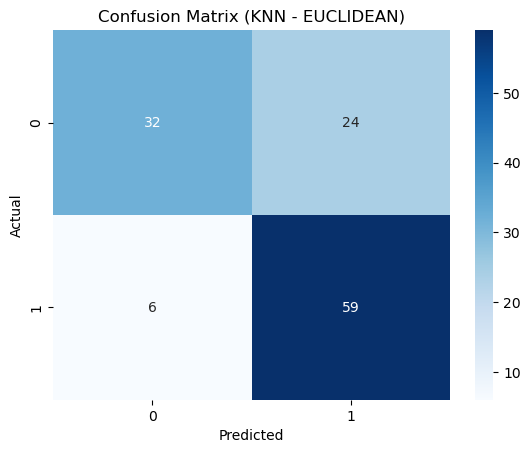

In [21]:
# Função para calcular a especificidade
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP)

# Separar 60% dos dados para treinamento e 40% para teste
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Define a faixa de valores k para serem testados
n_neighbors_values = [2, 3, 5, 8, 11, 13, 17]

# Escolher a distância euclidiana
knn = KNeighborsClassifier(metric='euclidean')

# Listas para armazenar os resultados
accuracies = []
recalls = []
specificities = []

# Loop para encontrar o melhor valor de k
for n_neighbors in n_neighbors_values:
    knn.n_neighbors = n_neighbors

    # Realizar previsões usando validação cruzada (5-fold)
    kfold = KFold(n_splits=5)
    y_pred_cv = cross_val_predict(knn, X_train, y_train, cv=kfold)

    # Calcular as métricas manualmente
    accuracy = accuracy_score(y_train, y_pred_cv)
    recall = recall_score(y_train, y_pred_cv)
    specificity = specificity_score(y_train, y_pred_cv)

    # Armazenar os resultados
    accuracies.append(accuracy)
    recalls.append(recall)
    specificities.append(specificity)

# Encontrar o melhor valor de k com base na sensibilidade (recall)
best_k = n_neighbors_values[recalls.index(max(recalls))]

# Treinar o modelo com o melhor k
knn.n_neighbors = best_k
knn.fit(X_train, y_train)

# Realizar previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calcular a matriz de confusão e as métricas para o conjunto de teste
cm = confusion_matrix(y_test, y_pred)
accuracy_test = accuracy_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
specificity_test = specificity_score(y_test, y_pred)

# Imprimir os resultados
print("Matriz de Confusão - EUCLIDEAN:")
print(cm)
print("\nAcurácia: {:.2f}%".format(accuracy_test * 100))
print("Sensibilidade: {:.2f}%".format(recall_test * 100))
print("Especificidade: {:.2f}%".format(specificity_test * 100))

# Plotar a matriz de confusão
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix (KNN - EUCLIDEAN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Matriz de confusão com distância de Chebyshev

Matriz de Confusão - CHEBYSHEV:
[[34 22]
 [ 8 57]]

Acurácia: 75.21%
Sensibilidade: 87.69%
Especificidade: 60.71%


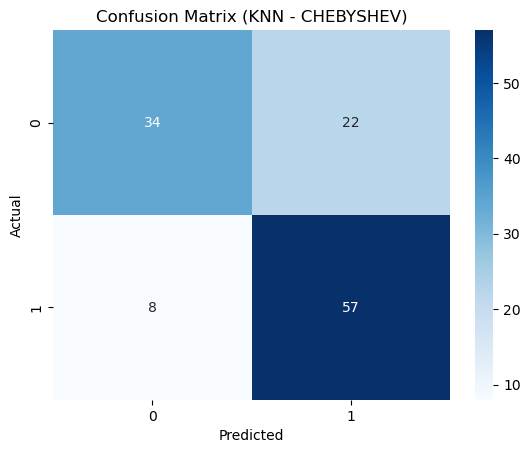

In [22]:
# Função para calcular a especificidade
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP)

# Separar 60% dos dados para treinamento e 40% para teste
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Define a faixa de valores k para serem testados
n_neighbors_values = [2, 3, 5, 8, 11, 13, 17]

# Escolher a distância euclidiana
knn = KNeighborsClassifier(metric='chebyshev')

# Listas para armazenar os resultados
accuracies = []
recalls = []
specificities = []

# Loop para encontrar o melhor valor de k
for n_neighbors in n_neighbors_values:
    knn.n_neighbors = n_neighbors

    # Realizar previsões usando validação cruzada (5-fold)
    kfold = KFold(n_splits=5)
    y_pred_cv = cross_val_predict(knn, X_train, y_train, cv=kfold)

    # Calcular as métricas manualmente
    accuracy = accuracy_score(y_train, y_pred_cv)
    recall = recall_score(y_train, y_pred_cv)
    specificity = specificity_score(y_train, y_pred_cv)

    # Armazenar os resultados
    accuracies.append(accuracy)
    recalls.append(recall)
    specificities.append(specificity)

# Encontrar o melhor valor de k com base na sensibilidade (recall)
best_k = n_neighbors_values[recalls.index(max(recalls))]

# Treinar o modelo com o melhor k
knn.n_neighbors = best_k
knn.fit(X_train, y_train)

# Realizar previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calcular a matriz de confusão e as métricas para o conjunto de teste
cm = confusion_matrix(y_test, y_pred)
accuracy_test = accuracy_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
specificity_test = specificity_score(y_test, y_pred)

# Imprimir os resultados
print("Matriz de Confusão - CHEBYSHEV:")
print(cm)
print("\nAcurácia: {:.2f}%".format(accuracy_test * 100))
print("Sensibilidade: {:.2f}%".format(recall_test * 100))
print("Especificidade: {:.2f}%".format(specificity_test * 100))

# Plotar a matriz de confusão (Teste)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix (KNN - CHEBYSHEV)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Matriz de confusão com distância de Canberra

Matriz de Confusão - CANBERRA:
[[37 19]
 [ 7 58]]

Acurácia: 78.51%
Sensibilidade: 89.23%
Especificidade: 66.07%


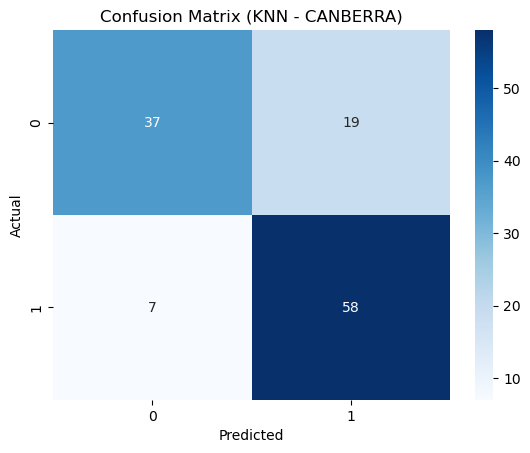

In [23]:
# Função para calcular a especificidade
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP)

# Separar 60% dos dados para treinamento e 40% para teste
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Define a faixa de valores k para serem testados
n_neighbors_values = [2, 3, 5, 8, 11, 13, 17]

# Escolher a distância euclidiana
knn = KNeighborsClassifier(metric='canberra')

# Listas para armazenar os resultados
accuracies = []
recalls = []
specificities = []

# Loop para encontrar o melhor valor de k
for n_neighbors in n_neighbors_values:
    knn.n_neighbors = n_neighbors

    # Realizar previsões usando validação cruzada (5-fold)
    kfold = KFold(n_splits=5)
    y_pred_cv = cross_val_predict(knn, X_train, y_train, cv=kfold)

    # Calcular as métricas manualmente
    accuracy = accuracy_score(y_train, y_pred_cv)
    recall = recall_score(y_train, y_pred_cv)
    specificity = specificity_score(y_train, y_pred_cv)

    # Armazenar os resultados
    accuracies.append(accuracy)
    recalls.append(recall)
    specificities.append(specificity)

# Encontrar o melhor valor de k com base na sensibilidade (recall)
best_k = n_neighbors_values[recalls.index(max(recalls))]

# Treinar o modelo com o melhor k
knn.n_neighbors = best_k
knn.fit(X_train, y_train)

# Realizar previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calcular a matriz de confusão e as métricas para o conjunto de teste
cm = confusion_matrix(y_test, y_pred)
accuracy_test = accuracy_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
specificity_test = specificity_score(y_test, y_pred)

# Imprimir os resultados
print("Matriz de Confusão - CANBERRA:")
print(cm)
print("\nAcurácia: {:.2f}%".format(accuracy_test * 100))
print("Sensibilidade: {:.2f}%".format(recall_test * 100))
print("Especificidade: {:.2f}%".format(specificity_test * 100))

# Plotar a matriz de confusão (Teste)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix (KNN - CANBERRA)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Matriz de confusão com distância de Braycurtis

Matriz de Confusão - BRAYCURTIS:
[[36 20]
 [ 5 60]]

Acurácia: 79.34%
Sensibilidade: 92.31%
Especificidade: 64.29%


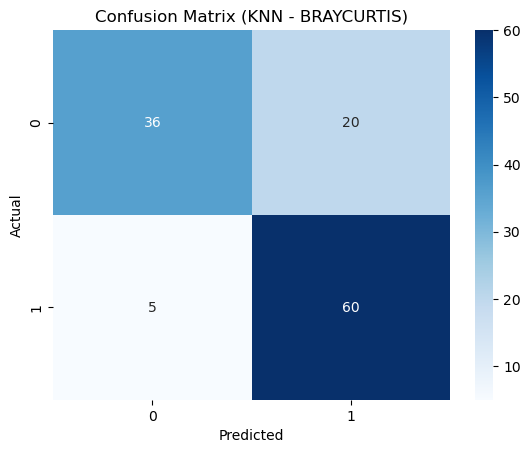

In [24]:
# Função para calcular a especificidade
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP)

# Separar 60% dos dados para treinamento e 40% para teste
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Define a faixa de valores k para serem testados
n_neighbors_values = [2, 3, 5, 8, 11, 13, 17]

# Escolher a distância euclidiana
knn = KNeighborsClassifier(metric='braycurtis')

# Listas para armazenar os resultados
accuracies = []
recalls = []
specificities = []

# Loop para encontrar o melhor valor de k
for n_neighbors in n_neighbors_values:
    knn.n_neighbors = n_neighbors

    # Realizar previsões usando validação cruzada (5-fold)
    kfold = KFold(n_splits=5)
    y_pred_cv = cross_val_predict(knn, X_train, y_train, cv=kfold)

    # Calcular as métricas manualmente
    accuracy = accuracy_score(y_train, y_pred_cv)
    recall = recall_score(y_train, y_pred_cv)
    specificity = specificity_score(y_train, y_pred_cv)

    # Armazenar os resultados
    accuracies.append(accuracy)
    recalls.append(recall)
    specificities.append(specificity)

# Encontrar o melhor valor de k com base na sensibilidade (recall)
best_k = n_neighbors_values[recalls.index(max(recalls))]

# Treinar o modelo com o melhor k
knn.n_neighbors = best_k
knn.fit(X_train, y_train)

# Realizar previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calcular a matriz de confusão e as métricas para o conjunto de teste
cm = confusion_matrix(y_test, y_pred)
accuracy_test = accuracy_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
specificity_test = specificity_score(y_test, y_pred)

# Imprimir os resultados
print("Matriz de Confusão - BRAYCURTIS:")
print(cm)
print("\nAcurácia: {:.2f}%".format(accuracy_test * 100))
print("Sensibilidade: {:.2f}%".format(recall_test * 100))
print("Especificidade: {:.2f}%".format(specificity_test * 100))

# Plotar a matriz de confusão (Teste)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix (KNN - BRAYCURTIS)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
